In [3]:
import os 

import pandas as pd
import numpy as np
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

In [5]:
query = '''select * from customers limit 4;'''
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [6]:
query = 'show tables;'
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [7]:
query = '''select * from salesdata limit 3;'''
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00


In [9]:
query = """select s.customerid, c.firstname,s.saledate, s.totalprice
from salesdata s
join customers c
on s.customerid = c.customerid
limit 5;
"""

read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [14]:
query = """
select t.customerid,c.firstname,t.expenditure
from
(Select customerid,
sum(totalprice) as expenditure
from salesdata
group by customerid) t
join customers c
on t.customerid=c.customerid
order by t.expenditure desc
limit 10;
"""

top_annual_customers = read_query(query)

In [15]:
top_annual_customers

,customerid,firstname,expenditure
0,C-2023-100-13,Veer,13016064.00
1,C-2023-100-94,Priyansh,12629337.00
2,C-2023-100-57,Riya,12599608.00
3,C-2023-100-58,Vanya,12455437.00
4,C-2023-100-88,Dhruv,12280916.00
5,C-2023-100-165,Tarini,12130487.00
6,C-2023-100-197,Yuvraj,11868602.00
7,C-2023-100-199,Rhea,11704275.00
8,C-2023-100-196,Darshit,11520699.00
9,C-2023-100-75,Prerak,11442527.00


In [19]:
top_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customerid   10 non-null     object 
 1   firstname    10 non-null     object 
 2   expenditure  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [18]:
top_annual_customers ['expenditure'] = top_annual_customers ['expenditure'].astype(float)

In [20]:
top_annual_customers ['expenditure'].values

array([13016064., 12629337., 12599608., 12455437., 12280916., 12130487.,
       11868602., 11704275., 11520699., 11442527.])

In [21]:
customer_exp = top_annual_customers['expenditure'].values

In [24]:
customer_names = top_annual_customers['firstname'].values

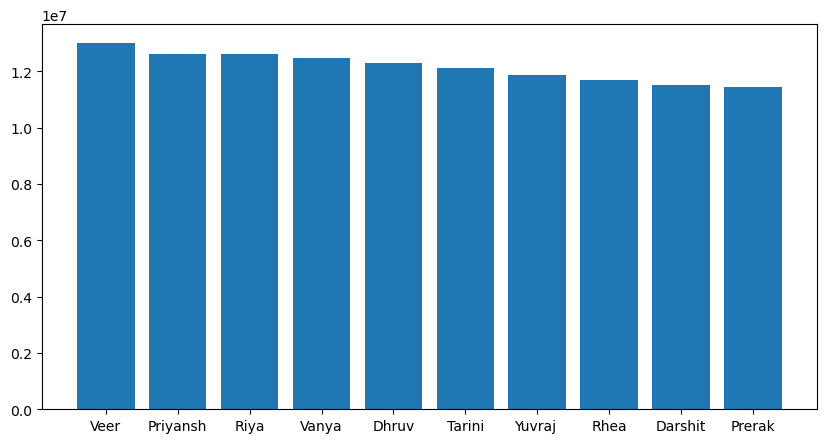

In [27]:
plt.figure(figsize=(10,5))
plt.bar(height=customer_exp,x=customer_names)
plt.savefig('top_annual_customers.jpeg')